In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from utils import load_config, load_checkpoint
from models.infer_model_single import Inference
from dataset import Words
from torchvision.transforms.functional import to_tensor

In [6]:
config_file = 'config_mlhme_test.yaml'

"""Config"""
params = load_config(config_file)

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
params['device'] = device
words = Words(params['word_path'])
params['word_num'] = len(words)

if 'use_label_mask' not in params:
    params['use_label_mask'] = False
model = Inference(params)
model = model.to(device)
load_checkpoint(model, None, params['checkpoint'])
model.eval()

Dictionary: 206 symbols
No optimizer in the pretrained model


Inference(
  (encoder): DenseNet(
    (conv1): Conv2d(1, 48, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (dense1): Sequential(
      (0): Bottleneck(
        (bn1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv2d(48, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(96, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (dropout): Dropout(p=0.2, inplace=False)
      )
      (1): Bottleneck(
        (bn1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv2d(72, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(96, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (dropout): 

Image shape: torch.Size([1, 1, 38, 338])
Prediction: B D \bot A C S A O = C O


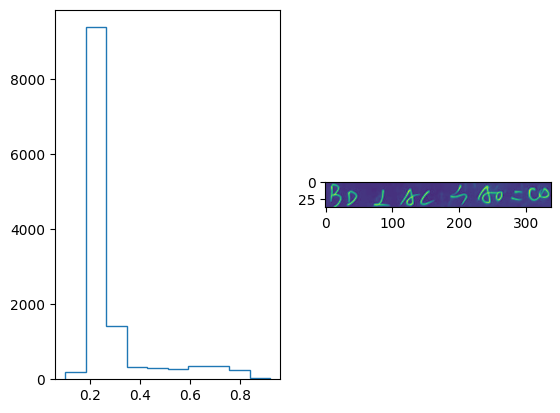

In [7]:
import os, random
# path = r"d:\Masterproef\echmer\data\Televic\png_files"
path = r"MLHME-38K\train_set\train_images"
image_path = path + '\\' + random.choice(os.listdir(path))
#image_path = r'D:\Masterproef\echmer\data\MLHME-38K\train_set\train_images\train_0.jpg'

try:
    im = Image.open(image_path).convert('L')
except:
    raise IOError
img = to_tensor(im)
im.close()
img = 1 - img

#max, min = torch.max(img), torch.min(img)

#img  = (img-min)/(max-min) 

counts, bins = np.histogram(img.permute(1, 2, 0))
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.stairs(counts, bins)
ax2.imshow(img.permute(1, 2, 0))
img = img.unsqueeze(0)
print('Image shape:', img.shape)

with torch.no_grad():
    img = img.to(device)

    probs, _ = model(img, os.path.join(params['decoder']['net']))

    prediction = words.decode(probs)

print(f'Prediction: {prediction}')